In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize
from scipy import optimize
from sklearn.metrics import mean_squared_error
import pandas as pd

eps = 0.001
seed = np.random.RandomState(12345)

## data generation
# alpha = seed.random()
# beta = seed.random()
# x = np.arange(0, 101) / 100
# y = alpha * x + beta + seed.normal(0, 1, 101)

# pd.DataFrame({'x' : x, 'y': y}).to_csv('./data.csv',index=False)


data = pd.read_csv('./data.csv')
x = data['x'].values
y = data['y'].values
alpha = 0.9296160928171479
beta = 0.3163755545817859

In [5]:
def linear(x, a, b):
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)


def minimization_function_linear(koefs):
    a,b = koefs
    return mean_squared_error(linear(x,a,b),y,squared=False)


def minimization_function_rational(koefs):
    a,b = koefs
    return mean_squared_error(rational(x,a,b),y,squared=False)

{'iterations': 3, 'calls': 72}


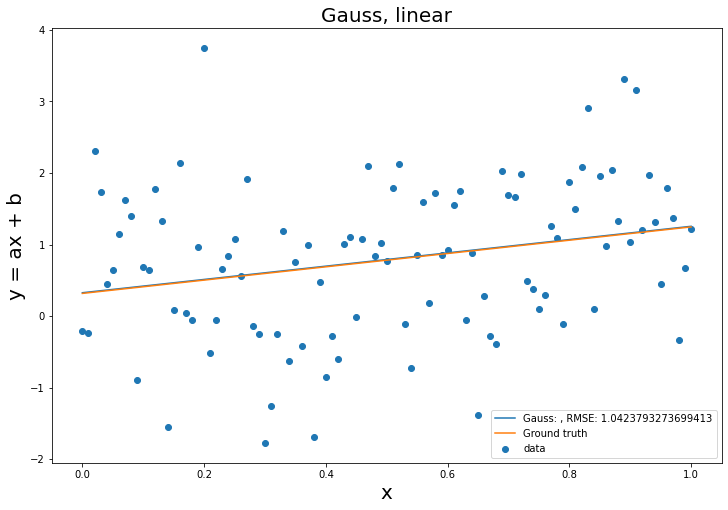

In [6]:
gauss = minimize(
        fun=minimization_function_linear, 
        x0=(0, 0), 
        method='Powell',
    )

gauss_linear_a, gauss_linear_b =  gauss.x

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
print({'iterations' : gauss.nit, 'calls' : gauss.nfev})

ax.plot(x, 
        linear(x, *gauss.x), 
        label=f'Gauss: , RMSE: {mean_squared_error(linear(x,gauss_linear_a, gauss_linear_b),y,squared=False)}')
                                     
ax.plot(x, 
        linear(x, alpha, beta), 
        label='Ground truth')
ax.scatter(x, y, label='data')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y = ax + b', fontsize=20)
ax.set_title('Gauss, linear', fontsize=20)
ax.legend()
plt.show()
fig.savefig(f'./images/linear_Gauss.png')

{'iterations': 5, 'calls': 147}


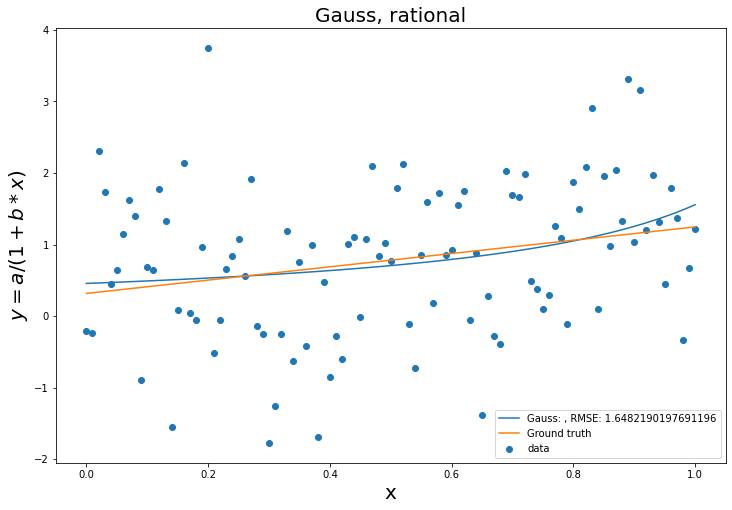

In [7]:
gauss = minimize(
        fun=minimization_function_rational, 
        x0=(0, 0), 
        method='Powell',
    )

gauss_rational_a, gauss_rational_b =  gauss.x

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
print({'iterations' : gauss.nit, 'calls' : gauss.nfev})

ax.plot(x, 
        rational(x, *gauss.x), 
        label=f'Gauss: , RMSE: {mean_squared_error(linear(x,gauss_rational_a, gauss_rational_b),y,squared=False)}')
                                     
ax.plot(x, 
        linear(x, alpha, beta), 
        label='Ground truth')
ax.scatter(x, y, label='data')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel(r'$y = a/(1 + b * x)$', fontsize=20)
ax.set_title('Gauss, rational', fontsize=20)
ax.legend()
plt.show()
fig.savefig(f'./images/rational_Gauss.png')